### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Create a function to display the image in a larger size

In [2]:
def display(img, cmap = None):
    plt.figure(figsize = (10,8))
    plt.imshow(img, cmap = cmap)

### Read 'coins_image.jpg' with cv2

In [3]:
coin = cv2.imread('coins_image.jpg')

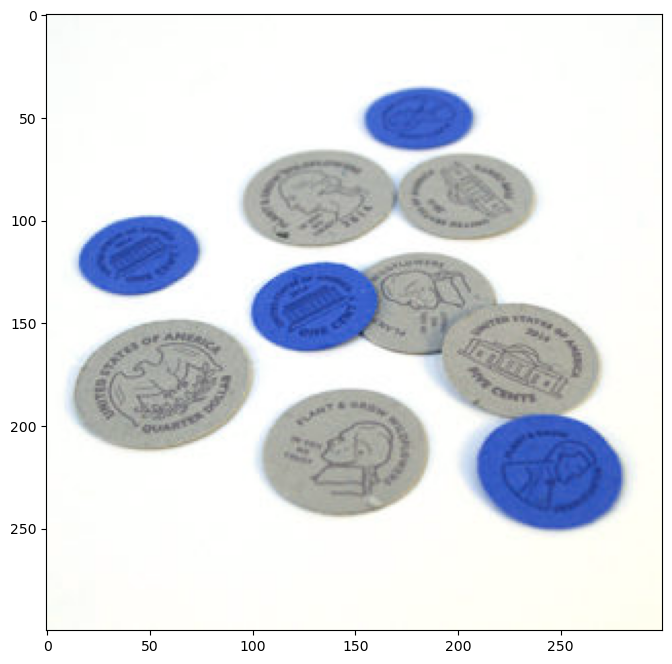

In [5]:
display(coin)

### Apply Median Blur

In [8]:
med_blur = cv2.medianBlur(coin, 25)

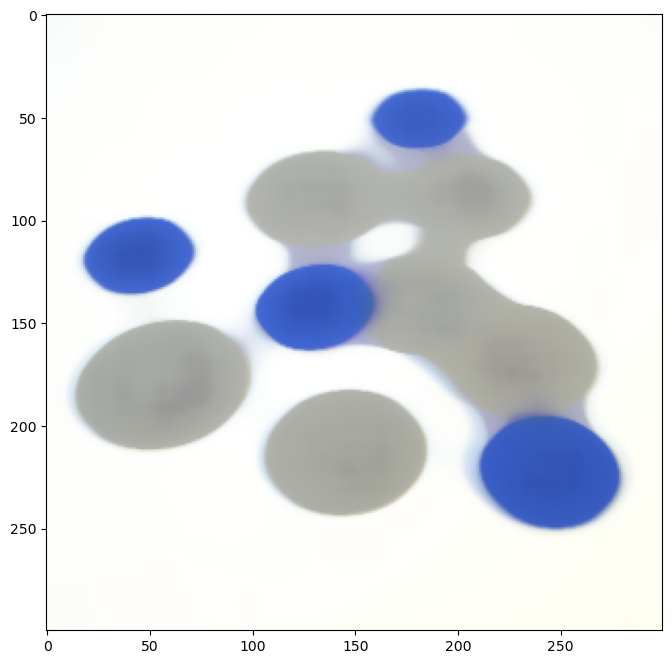

In [9]:
display(med_blur)

### Convert to Grayscale

In [28]:
gray = cv2.cvtColor(med_blur, cv2.COLOR_BGR2GRAY)

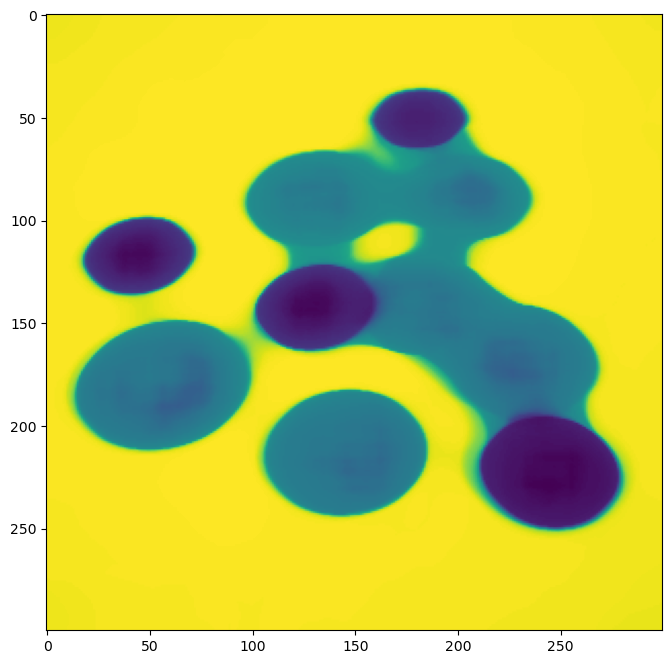

In [29]:
display(gray)

### Apply threshold (Inverse binary with OTSU)

In [35]:
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

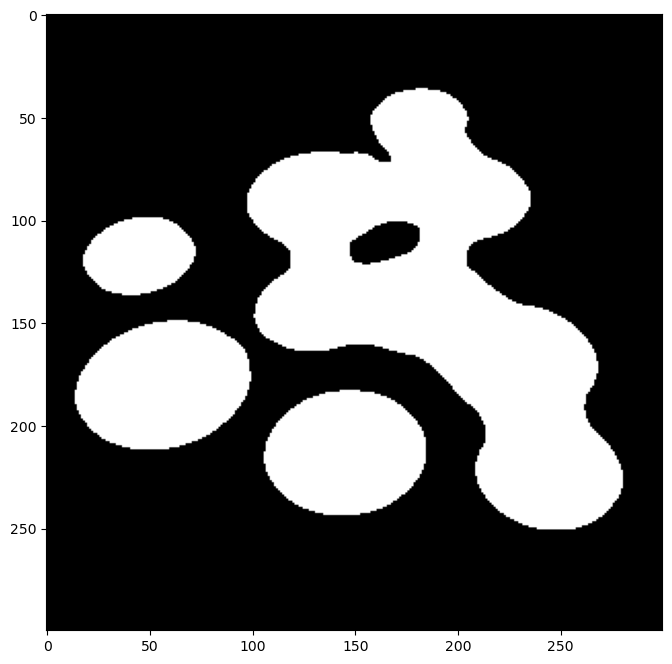

In [36]:
display(thresh, cmap = 'gray')

### Remove noise with the help of a morphological operator

In [43]:
kernal = np.ones((3,3))
noise = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernal, iterations = 3)

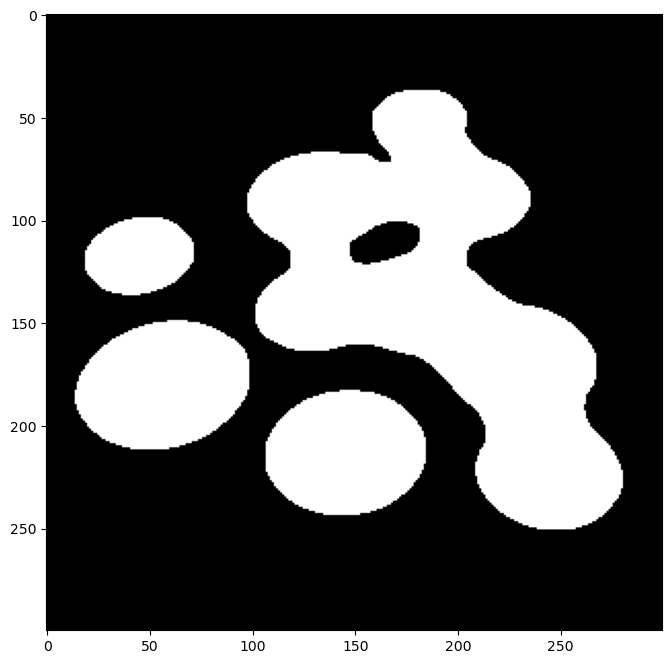

In [44]:
display(noise, cmap = 'gray')

### Grab background that you are sure of

In [54]:
sure_bg = cv2.dilate(noise, kernal, iterations = 3)

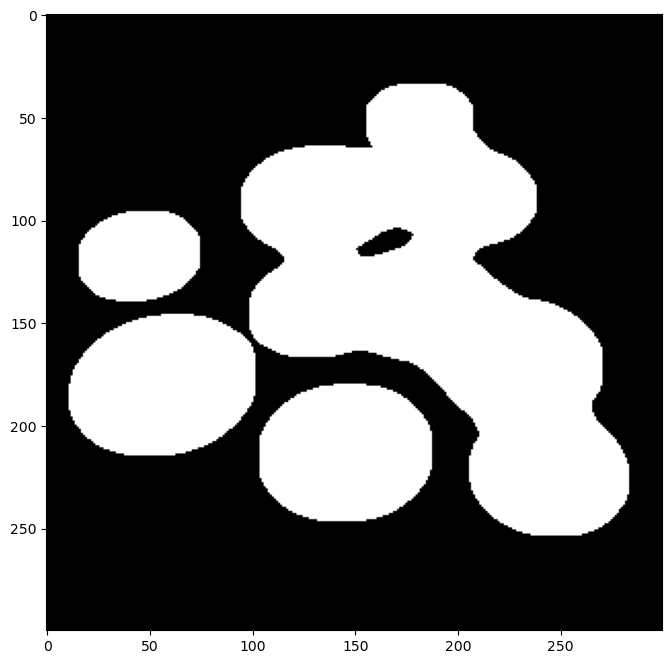

In [55]:
display(s_bg, cmap = 'gray')

### Find sure Foreground

In [47]:
dist_transform = cv2.distanceTransform(noise, cv2.DIST_L2, 5)

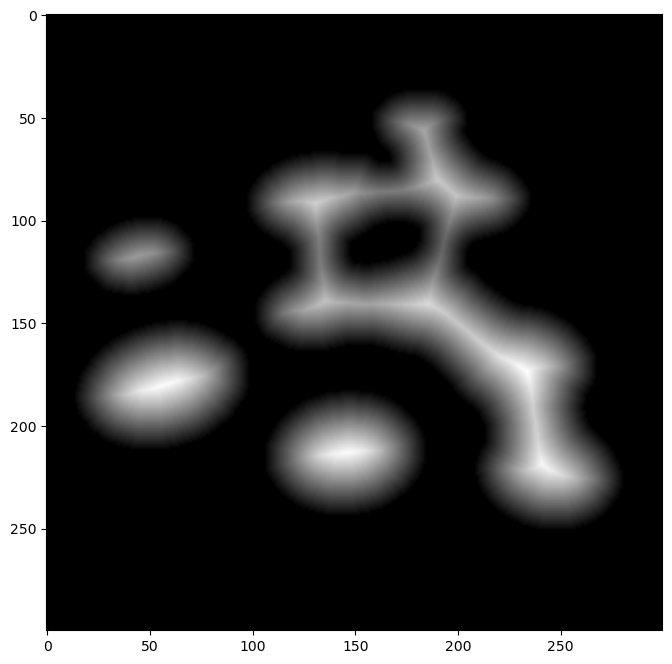

In [48]:
display(dist_transform, cmap = 'gray')

In [52]:
ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)

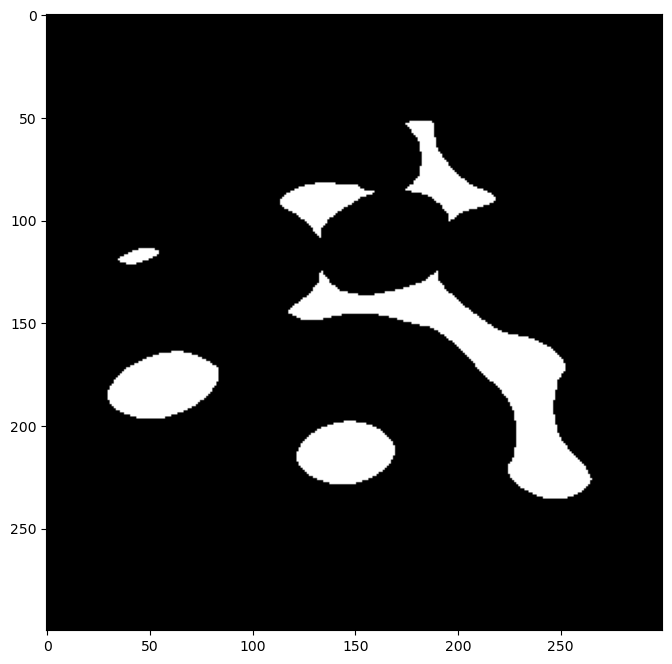

In [53]:
display(sure_fg, cmap = 'gray')

### Find unknown region

In [56]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

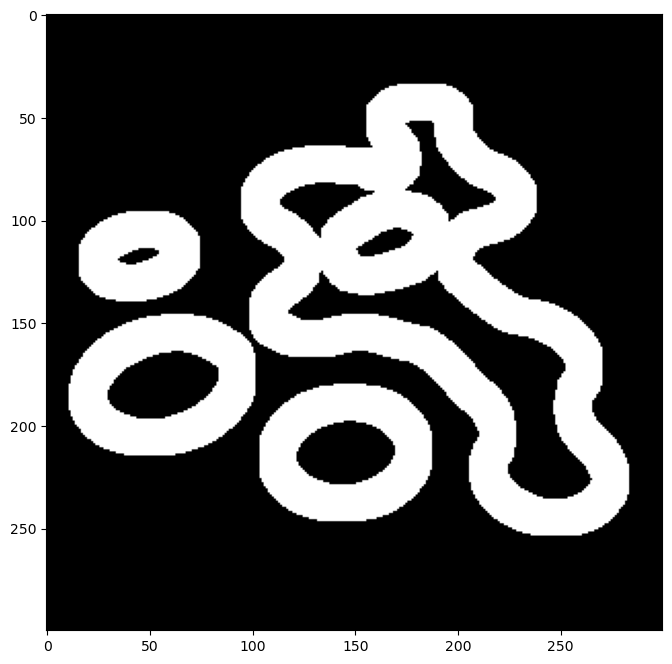

In [57]:
display(unknown, cmap = 'gray')

### Label Markers of sure Foreground

In [58]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0 

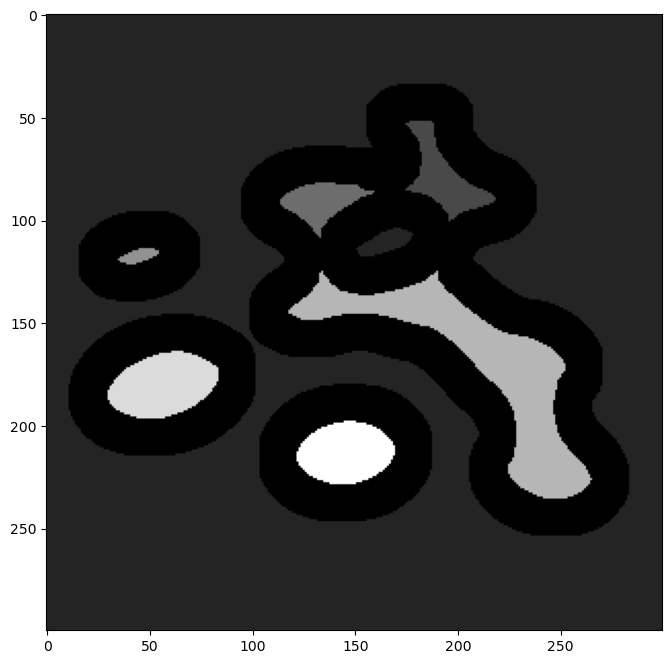

In [59]:
display(markers, cmap = 'gray')

### Apply watersheld alogirithm to find markers

In [60]:
markers = cv2.watershed(coin, markers)

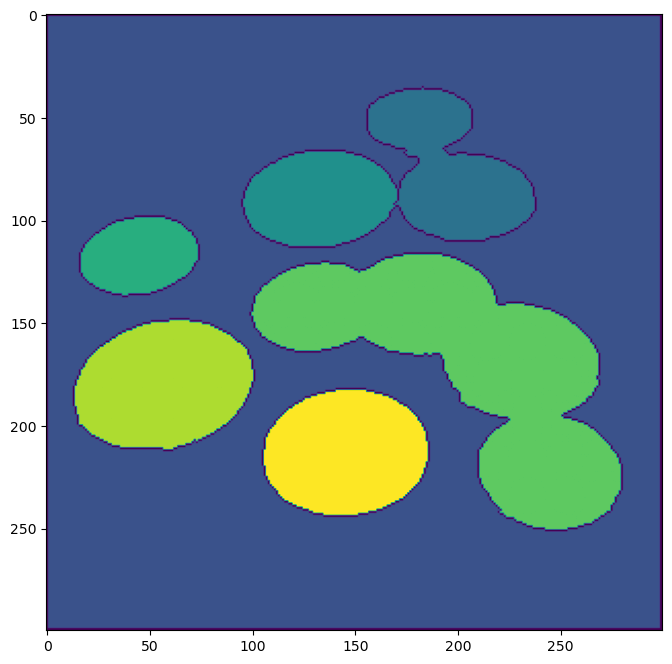

In [61]:
display(markers)

### Read the image again

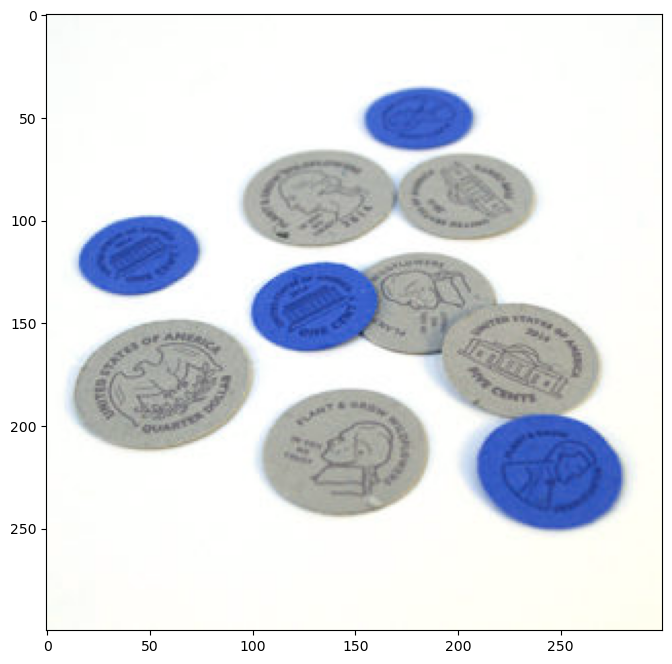

In [63]:
display(coin)

### Find contours on Markers

In [66]:
contours, heirchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if heirchy[0][i][3] == -1:
        cv2.drawContours(coin, contours, i, (255, 0, 0), 10)

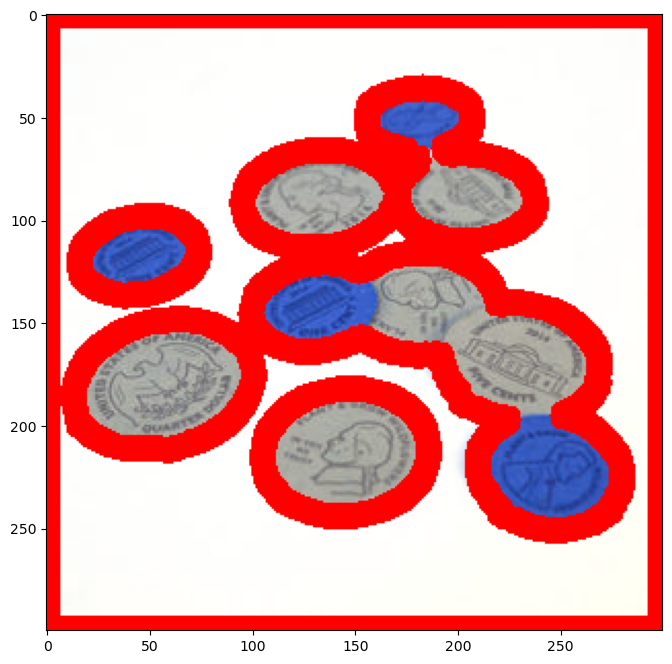

In [68]:
display(coin)

***